# **Libraries and Functions**

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [66]:
def outlierChecker(df_column):
    sorted(df_column)
    Q1,Q3 = np.percentile(df_column , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    print(f"Interquartile Range: {IQR}")
    print(f'Lower Range: {lower_range:.4}')
    print(f'Upper Range: {upper_range:.4}')

# **Data Preparation** 

In [67]:
df = pd.DataFrame(pd.read_csv('IOT-temp.csv'))
df

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In
...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In
97602,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In
97603,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In
97604,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In


In [68]:
for column in df:
    print(f'Column Name: "{column}" - Data Type: {df[column].dtype}')

Column Name: "id" - Data Type: object
Column Name: "room_id/id" - Data Type: object
Column Name: "noted_date" - Data Type: object
Column Name: "temp" - Data Type: int64
Column Name: "out/in" - Data Type: object


In [69]:
for column in df:
    print("*"*50)
    print(df[column].value_counts())

**************************************************
id
__export__.temp_log_196108_4a983c7e    2
__export__.temp_log_196134_bd201015    1
__export__.temp_log_12544_1a76a951     1
__export__.temp_log_134983_a6423bbe    1
__export__.temp_log_127926_3ba19d7a    1
                                      ..
__export__.temp_log_60241_79017f66     1
__export__.temp_log_60247_15b91351     1
__export__.temp_log_60243_af6d035d     1
__export__.temp_log_60245_13fc6805     1
__export__.temp_log_133741_32958703    1
Name: count, Length: 97605, dtype: int64
**************************************************
room_id/id
Room Admin    97606
Name: count, dtype: int64
**************************************************
noted_date
12-09-2018 03:09    65
09-09-2018 16:24    62
09-09-2018 17:31    53
11-09-2018 19:42    50
09-09-2018 16:08    50
                    ..
22-11-2018 21:23     1
22-11-2018 21:21     1
21-10-2018 05:41     1
21-10-2018 05:45     1
21-10-2018 21:54     1
Name: count, Length: 27920, dty

In [70]:
clean_df = df.copy()
clean_df = clean_df.drop(columns = ['id', 'room_id/id'])
clean_df = pd.DataFrame(clean_df.groupby(['noted_date', 'out/in'], as_index = False)['temp'].mean())
clean_df = clean_df.set_index('noted_date')
clean_df.index = pd.to_datetime(clean_df.index,format="%d-%m-%Y %H:%M")

In [71]:
for column in clean_df:
    print("*"*50)
    print(clean_df[column].value_counts())

**************************************************
out/in
Out    22605
In      8733
Name: count, dtype: int64
**************************************************
temp
41.000000    1791
42.000000    1514
31.000000    1479
30.000000    1474
44.000000    1387
             ... 
42.040000       1
30.384615       1
41.920000       1
42.541667       1
27.230769       1
Name: count, Length: 1170, dtype: int64


# **Data Analysis**

## **Overall Distribution**

In [72]:
clean_df

,out/in,temp
noted_date,,
2018-11-01 00:06:00,In,32.0
2018-11-01 00:07:00,Out,40.0
2018-11-01 00:09:00,Out,39.0
2018-11-01 00:13:00,Out,40.0
2018-11-01 00:23:00,Out,40.0
...,...,...
2018-10-31 23:52:00,Out,40.0
2018-10-31 23:53:00,Out,39.0
2018-10-31 23:54:00,In,32.0


Text(0.5, 0, 'Temperature Distribution')

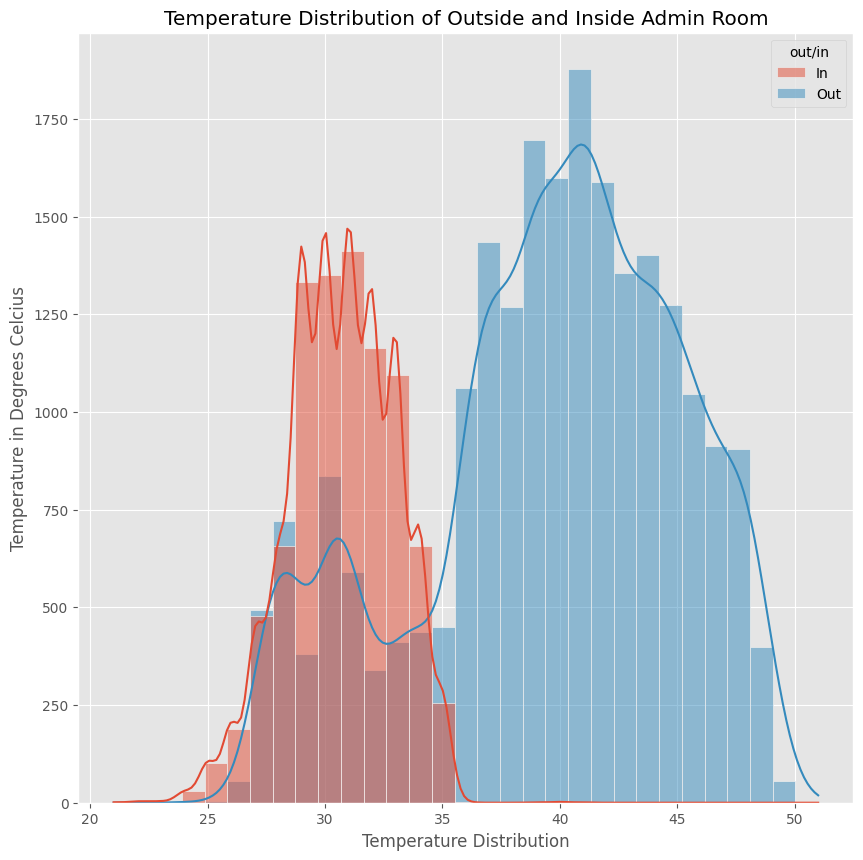

In [73]:
plt.figure(figsize=(10,10))
sns.histplot(x=clean_df.temp,hue=clean_df['out/in'],kde=True,bins=31)
plt.title('Temperature Distribution of Outside and Inside Admin Room')
plt.ylabel('Temperature in Degrees Celcius')
plt.xlabel('Temperature Distribution')

## **Inside Temperature**

Text(0.5, 0, 'Temperature in Degrees Celcius')

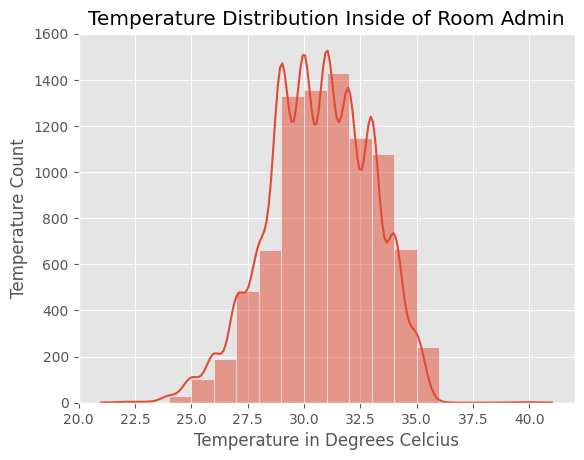

In [74]:
in_df = clean_df[clean_df['out/in'] == 'In']
sns.histplot(x=in_df.temp, kde=True,bins=20)
plt.title('Temperature Distribution Inside of Room Admin')
plt.ylabel('Temperature Count')
plt.xlabel('Temperature in Degrees Celcius')

Text(0, 0.5, 'Temperature')

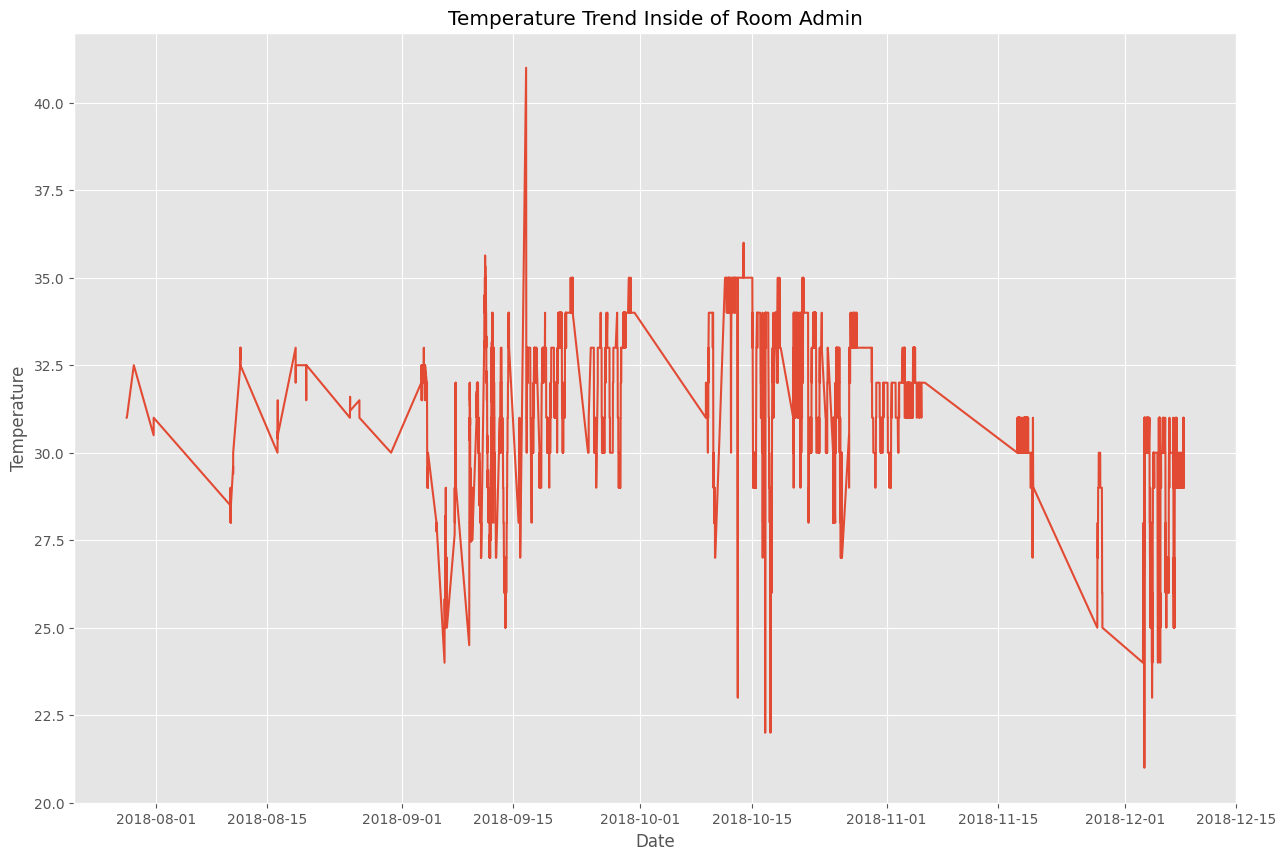

In [75]:
plt.figure(figsize=(15,10))
sns.lineplot(x=in_df.index, y=in_df.temp,markers=True)
plt.title('Temperature Trend Inside of Room Admin')
plt.xlabel('Date')
plt.ylabel('Temperature')

In [76]:
in_df['temp'].describe()

count    8733.000000
mean       30.670700
std         2.253968
min        21.000000
25%        29.000000
50%        31.000000
75%        32.000000
max        41.000000
Name: temp, dtype: float64

In [77]:
outlierChecker(in_df.temp)

Interquartile Range: 3.0
Lower Range: 24.5
Upper Range: 36.5


In [78]:
in_outlier = in_df[(in_df['temp'] < 24.5) | (in_df['temp'] > 36.5)]
in_outlier.sort_index()

,out/in,temp
noted_date,,
2018-09-06 07:45:00,In,24.000000
2018-09-06 07:46:00,In,24.200000
2018-09-06 07:47:00,In,24.333333
2018-09-16 14:15:00,In,41.000000
2018-09-16 14:17:00,In,40.000000
2018-09-16 14:19:00,In,40.000000
2018-09-16 14:21:00,In,39.000000
2018-10-13 06:02:00,In,23.000000
2018-10-13 06:04:00,In,23.000000


In [79]:
print(f"Outlier Percentage {(in_outlier.shape[0]/in_df.shape[0])*100:.4}%")

Outlier Percentage 0.4351%


## **Outside Temperature**

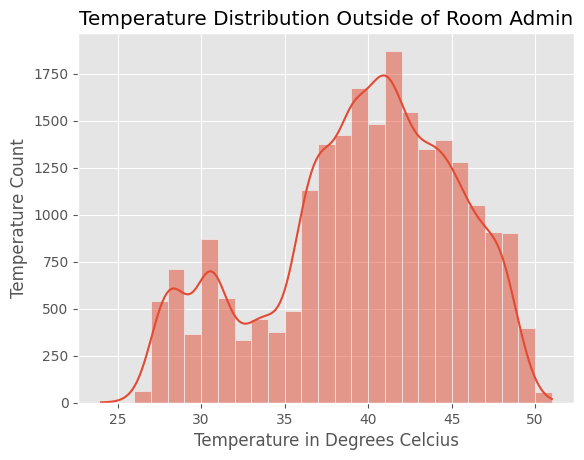

In [80]:
out_df = clean_df[clean_df['out/in'] == 'Out']
sns.histplot(x=out_df.temp, kde=True,bins=27)
plt.title('Temperature Distribution Outside of Room Admin')
plt.ylabel('Temperature Count')
plt.xlabel('Temperature in Degrees Celcius')
plt.show()

Text(0.5, 1.0, 'Temperature Trend Outside of Room Admin')

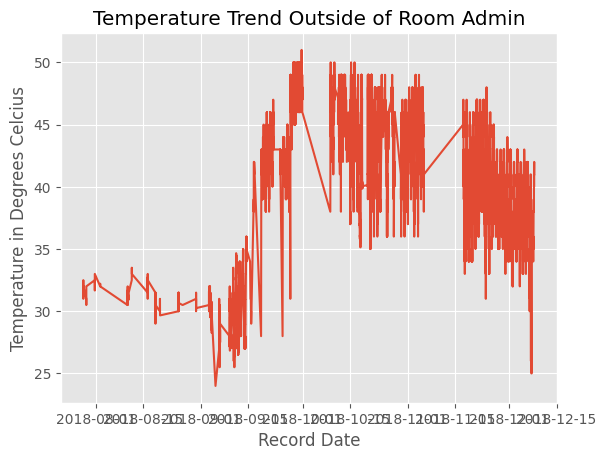

In [81]:
#plt.figure(figsize=(15,10))
sns.lineplot(x=out_df.index, y=out_df.temp)
plt.xlabel('Record Date')
plt.ylabel('Temperature in Degrees Celcius')
plt.title('Temperature Trend Outside of Room Admin')

In [82]:
out_df.describe()

,temp
count,22605.000000
mean,39.512309
std,5.605940
min,24.000000
25%,36.000000
50%,40.000000
75%,44.000000
max,51.000000


In [83]:
outlierChecker(out_df['temp'])

Interquartile Range: 8.0
Lower Range: 24.0
Upper Range: 56.0


In [84]:
out_outlier = out_df[(out_df['temp'] < 24.0) | (out_df['temp'] > 52.0)]
out_outlier.shape

(0, 2)

# **Feature**

## **Feature Creation**

In [85]:
clean_df

,out/in,temp
noted_date,,
2018-11-01 00:06:00,In,32.0
2018-11-01 00:07:00,Out,40.0
2018-11-01 00:09:00,Out,39.0
2018-11-01 00:13:00,Out,40.0
2018-11-01 00:23:00,Out,40.0
...,...,...
2018-10-31 23:52:00,Out,40.0
2018-10-31 23:53:00,Out,39.0
2018-10-31 23:54:00,In,32.0


**Create Features from Time Element:**
- Year
- Month
- Day
- Week
- Hour
- Minutes

In [86]:
def createFeatures(df):
    df=df.copy()
    df['minutes']=df.index.minute
    df['hour']=df.index.hour
    df['day_of_the_month']=df.index.day #1,2,3,4,...,31
    df['day_of_the_week']=df.index.dayofweek #{0:Monday, 1:Tuesday...}
    df['day_of_the_year']=df.index.dayofyear # Xposition out of 365
    df['month'] = df.index.month
    return df

clean_df = createFeatures(clean_df)
clean_df = clean_df.rename(columns={'out/in': 'location'}).copy()
clean_df

,location,temp,minutes,hour,day_of_the_month,day_of_the_week,day_of_the_year,month
noted_date,,,,,,,,
2018-11-01 00:06:00,In,32.0,6,0,1,3,305,11
2018-11-01 00:07:00,Out,40.0,7,0,1,3,305,11
2018-11-01 00:09:00,Out,39.0,9,0,1,3,305,11
2018-11-01 00:13:00,Out,40.0,13,0,1,3,305,11
2018-11-01 00:23:00,Out,40.0,23,0,1,3,305,11
...,...,...,...,...,...,...,...,...
2018-10-31 23:52:00,Out,40.0,52,23,31,2,304,10
2018-10-31 23:53:00,Out,39.0,53,23,31,2,304,10
2018-10-31 23:54:00,In,32.0,54,23,31,2,304,10


## **Feature Relationship against Temperature**

### **Location: Inside**

In [87]:
in_relation = clean_df[clean_df['location'] == 'In']
in_relation = in_relation.drop(columns=['location'],axis=1)
in_relation = in_relation.reset_index(drop=True)
in_relation

,temp,minutes,hour,day_of_the_month,day_of_the_week,day_of_the_year,month
0,32.0,6,0,1,3,305,11
1,32.0,12,2,1,3,305,11
2,32.0,44,2,1,3,305,11
3,32.0,46,2,1,3,305,11
4,31.0,58,2,1,3,305,11
...,...,...,...,...,...,...,...
8728,32.0,15,16,31,2,304,10
8729,32.0,25,16,31,2,304,10
8730,32.0,27,16,31,2,304,10
8731,32.0,50,23,31,2,304,10


In [88]:
list(in_relation.columns)

['temp',
 'minutes',
 'hour',
 'day_of_the_month',
 'day_of_the_week',
 'day_of_the_year',
 'month']

In [89]:
in_corr = in_relation[['temp',
 'minutes',
 'hour',
 'day_of_the_month',
 'day_of_the_week',
 'day_of_the_year',
 'month']].corr()
in_corr

,temp,minutes,hour,day_of_the_month,day_of_the_week,day_of_the_year,month
temp,1.000000,0.006357,0.099350,0.298407,-0.001930,-0.227249,-0.289121
minutes,0.006357,1.000000,-0.029369,0.021352,0.009618,0.000990,-0.004175
hour,0.099350,-0.029369,1.000000,-0.040968,-0.028791,-0.072116,-0.059892
day_of_the_month,0.298407,0.021352,-0.040968,1.000000,0.080331,-0.047561,-0.283114
day_of_the_week,-0.001930,0.009618,-0.028791,0.080331,1.000000,0.203047,0.175458
day_of_the_year,-0.227249,0.000990,-0.072116,-0.047561,0.203047,1.000000,0.971448
month,-0.289121,-0.004175,-0.059892,-0.283114,0.175458,0.971448,1.000000


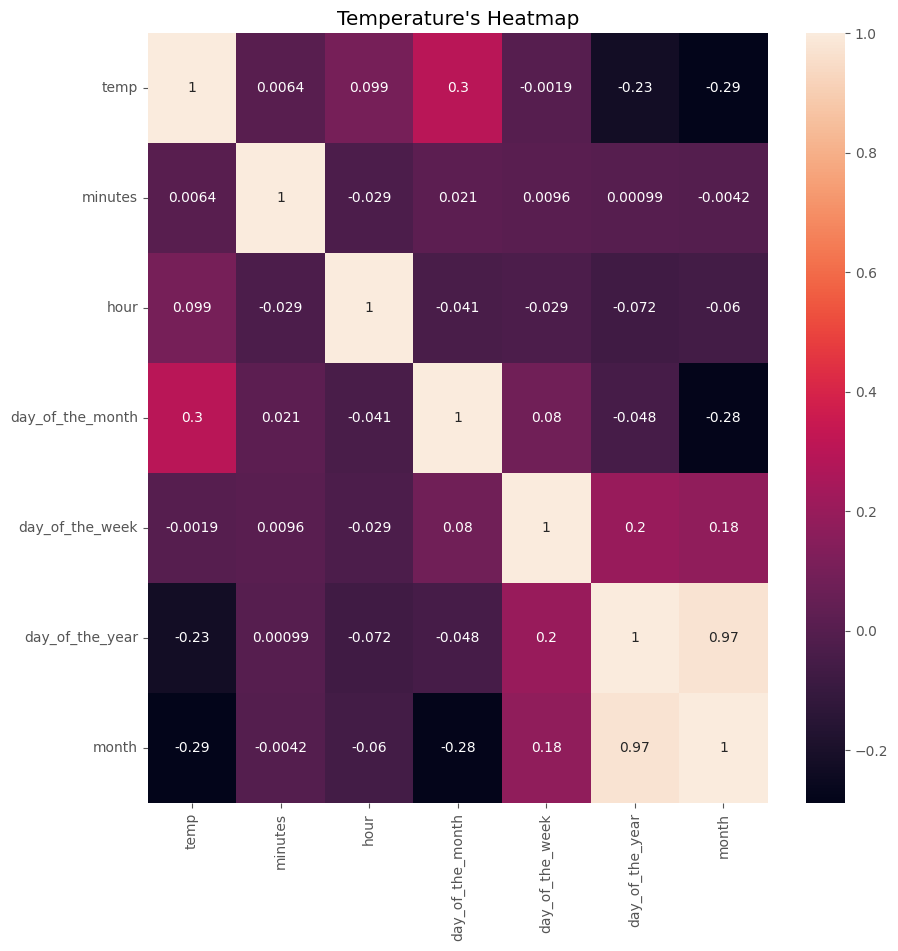

In [95]:
plt.figure(figsize=(10,10))
sns.heatmap(in_corr,annot=True,robust=True)
plt.title("Temperature's Heatmap")
plt.show()

In [96]:
in_relation.columns

Index(['temp', 'minutes', 'hour', 'day_of_the_month', 'day_of_the_week',
       'day_of_the_year', 'month'],
      dtype='object')

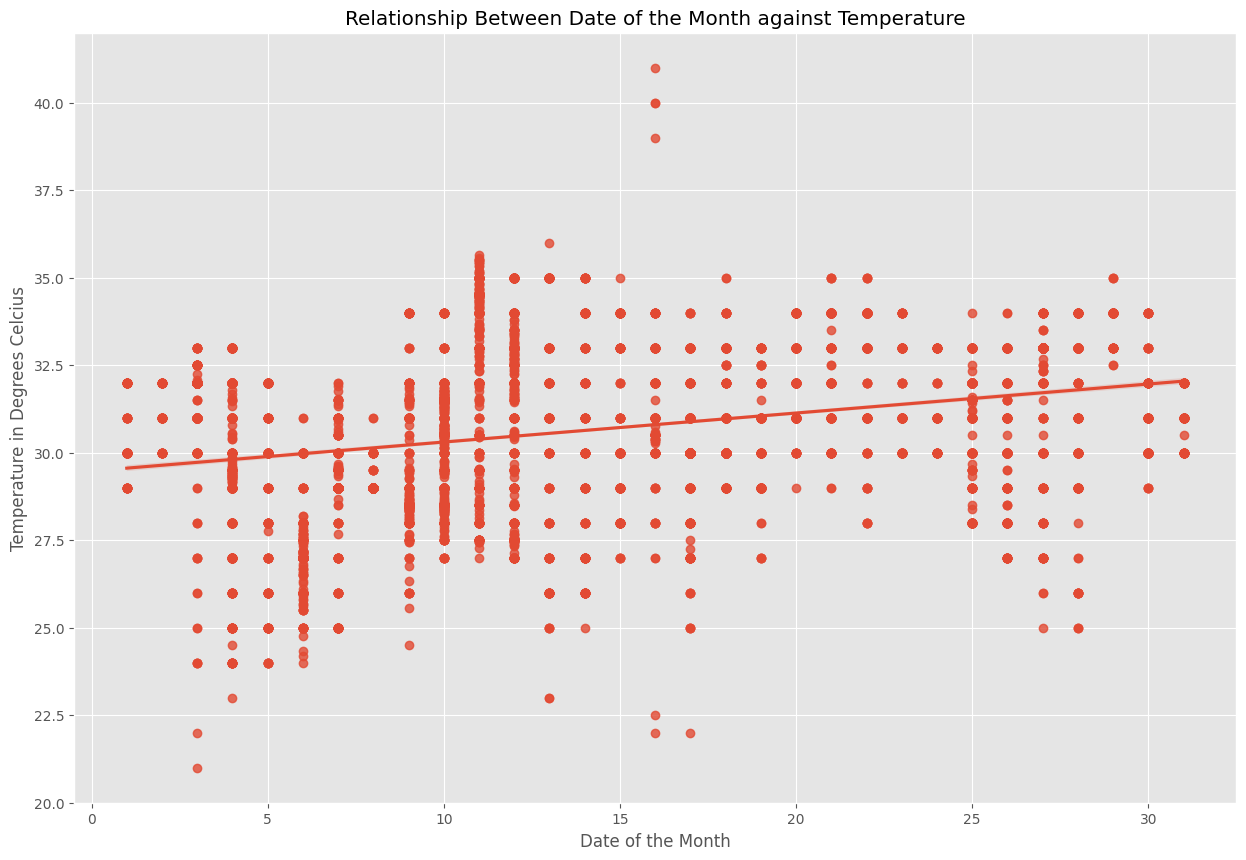

In [102]:
plt.figure(figsize=(15,10))
sns.regplot(x=in_relation.day_of_the_month, y=in_relation.temp)
plt.xlabel("Date of the Month")
plt.ylabel("Temperature in Degrees Celcius")
plt.title('Relationship Between Date of the Month against Temperature')
plt.show()

c:\Users\ugayj\.conda\envs\tensorflow-cpu\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ugayj\.conda\envs\tensorflow-cpu\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 81.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ugayj\.conda\envs\tensorflow-cpu\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 88.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ugayj\.conda\envs\tensorflow-cpu\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 83.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ugayj\.conda\envs\tensorflow

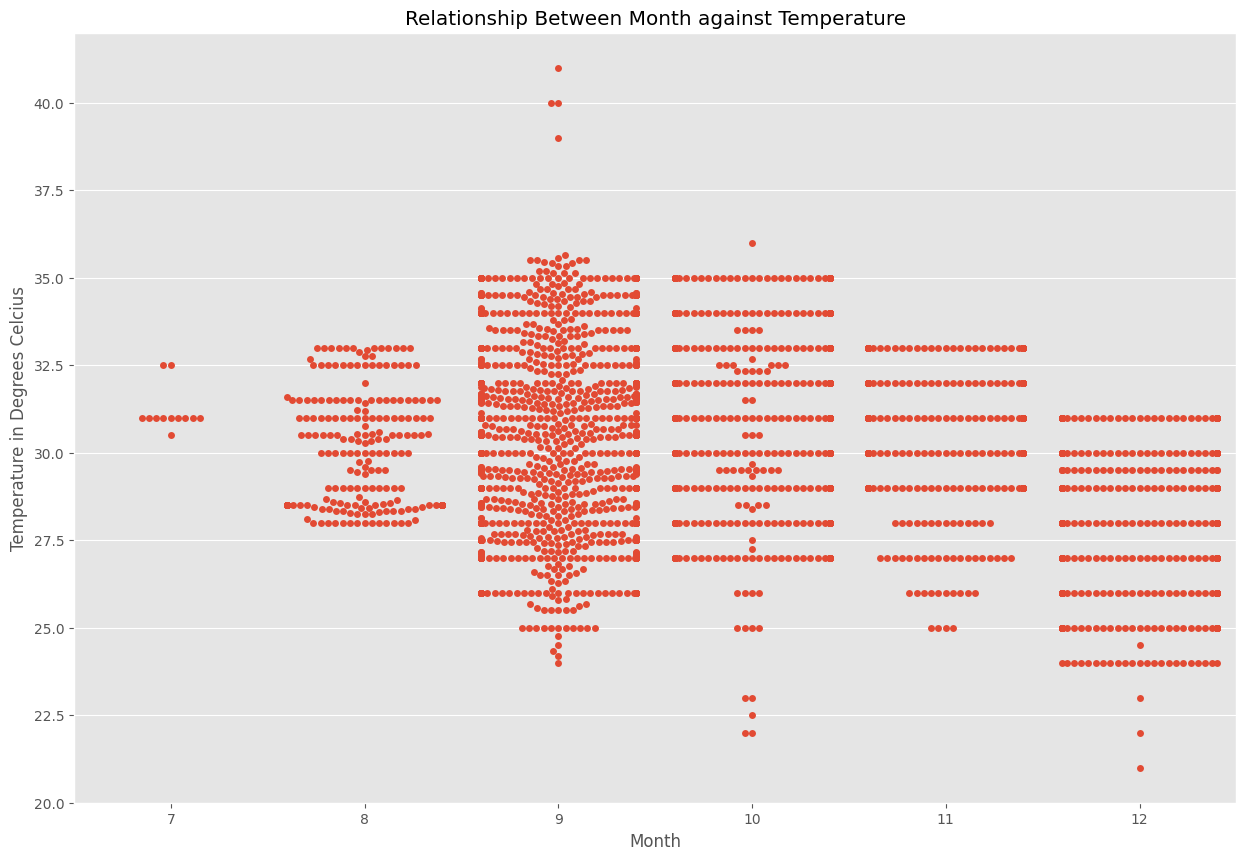

In [104]:
plt.figure(figsize=(15,10))
sns.swarmplot(x=in_relation.month, y=in_relation.temp)
plt.xlabel("Month")
plt.ylabel("Temperature in Degrees Celcius")
plt.title('Relationship Between Month against Temperature')
plt.show()

### **Location: Outside**

In [106]:
out_relation = clean_df[clean_df['location'] == 'Out']
out_relation = out_relation.reset_index(drop=True)
out_relation = out_relation.drop(columns=['location'])
out_relation.columns


Index(['temp', 'minutes', 'hour', 'day_of_the_month', 'day_of_the_week',
       'day_of_the_year', 'month'],
      dtype='object')

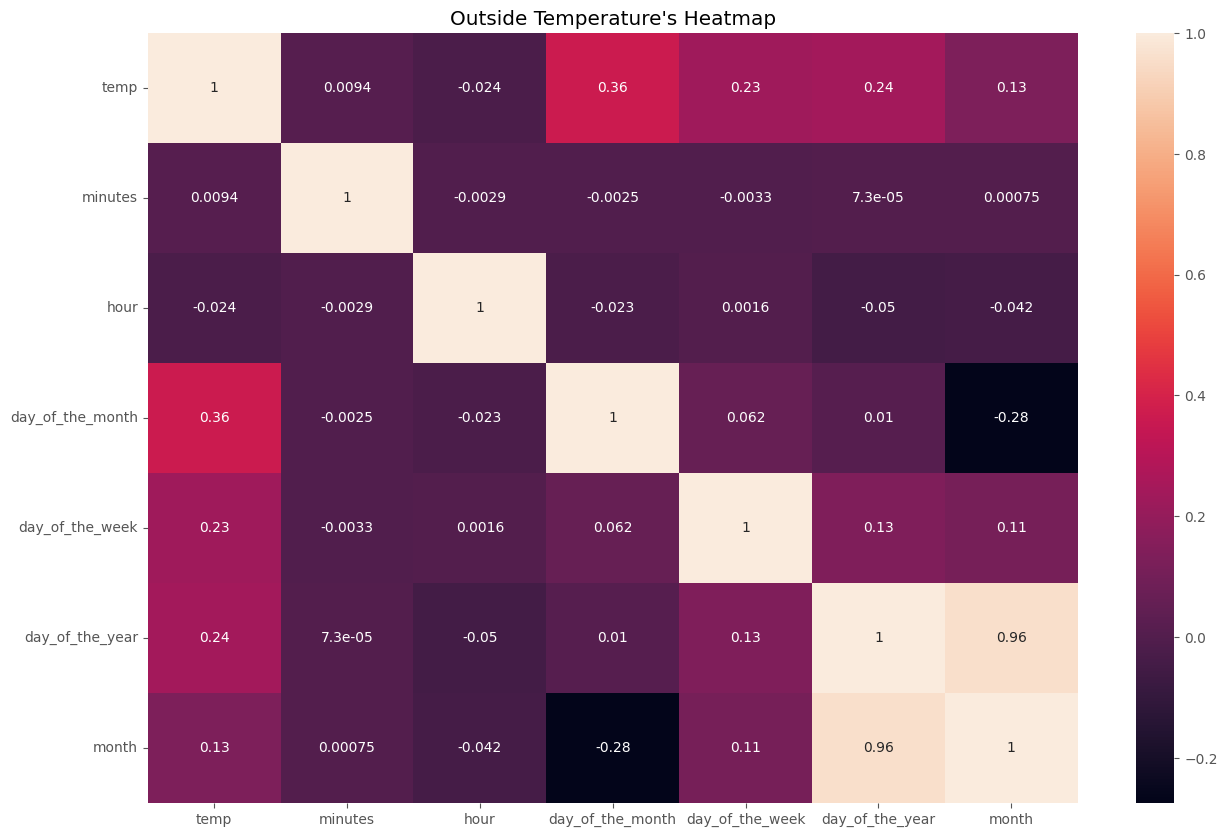

In [107]:
out_corr = out_relation[['temp', 'minutes', 'hour', 'day_of_the_month', 'day_of_the_week',
       'day_of_the_year', 'month']].corr()
plt.figure(figsize=(15,10))
sns.heatmap(out_corr,annot=True)
plt.title("Outside Temperature's Heatmap")
plt.show()

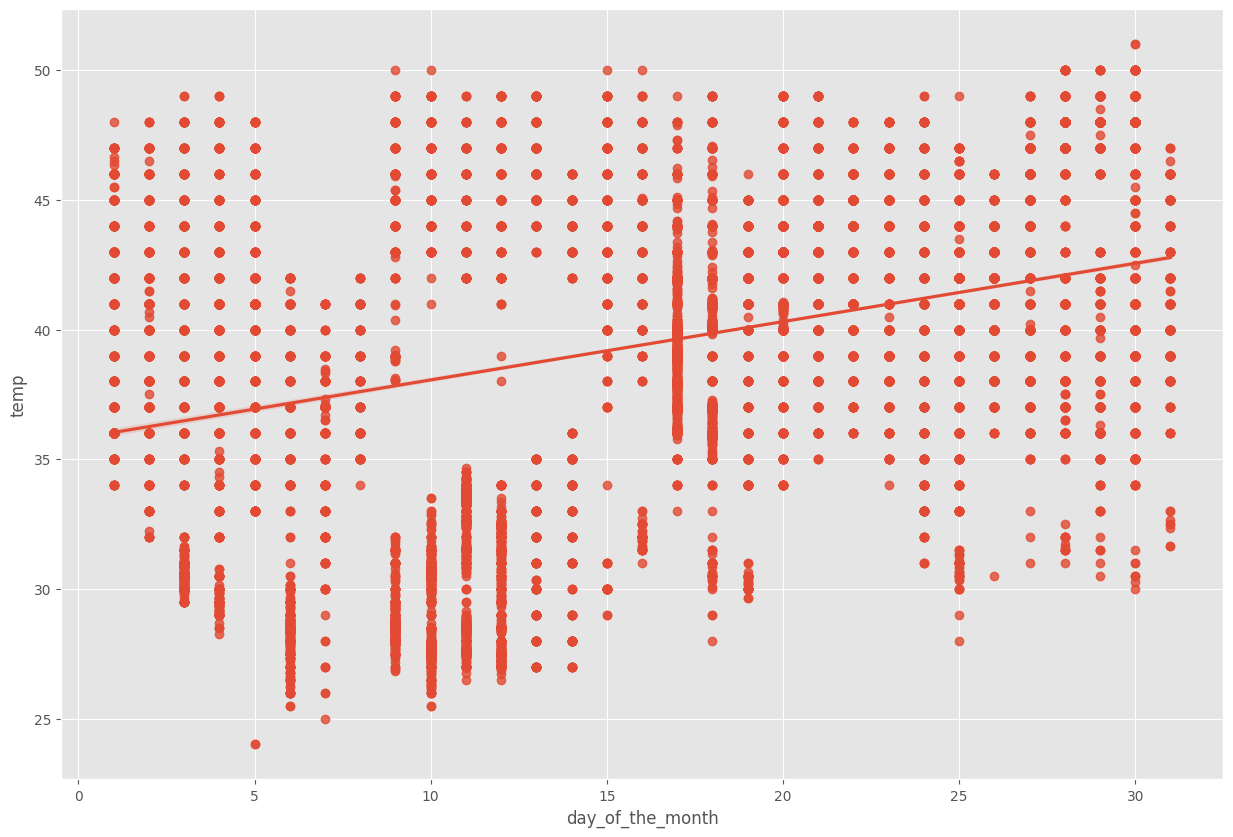

In [108]:
plt.figure(figsize=(15,10))
sns.regplot(x=out_relation.day_of_the_month,y=out_relation.temp)
plt.show()

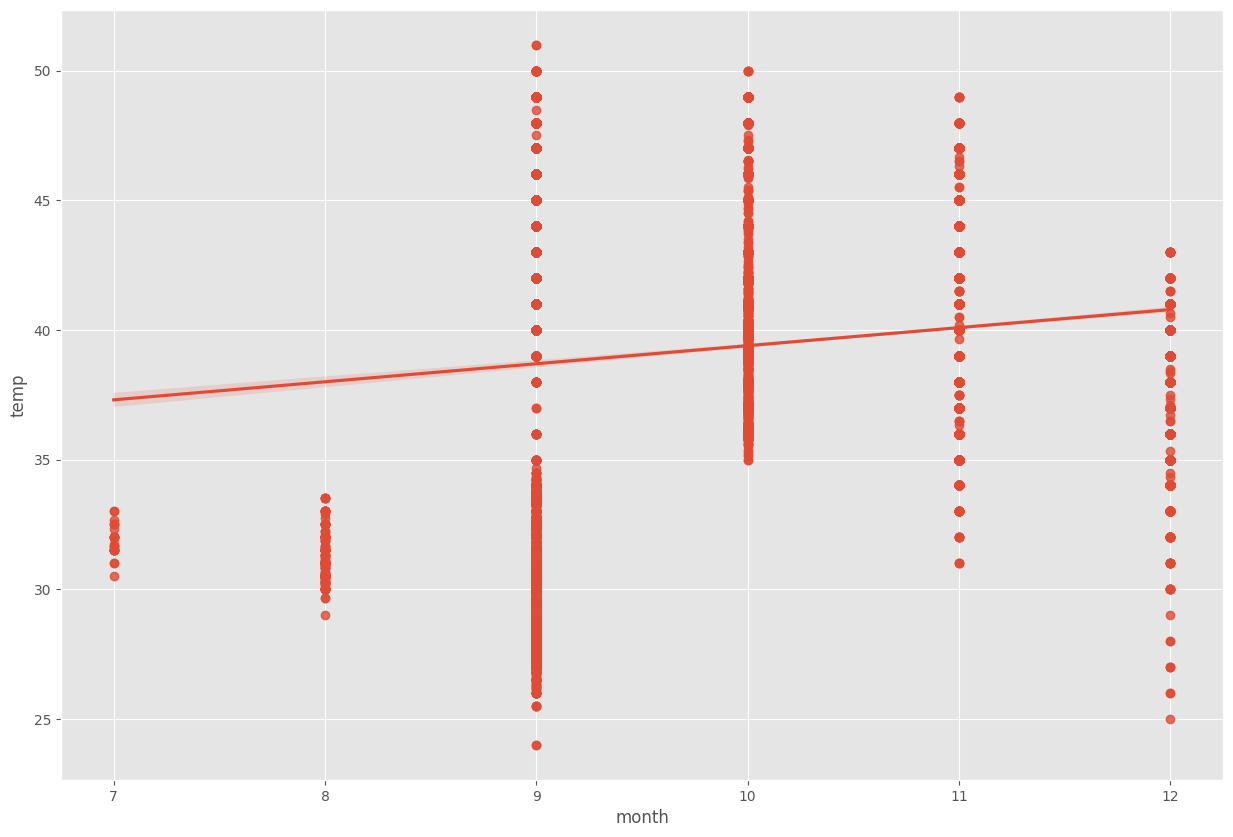

In [109]:
plt.figure(figsize=(15,10))
sns.regplot(x=out_relation.month,y=out_relation.temp)
plt.show()

# **Data Notes** 

**Data Preparation:**

- Data consists of [id, room/id, noted_date, temp, out/in]
- Noted Date should be date time format
- Ang daming mga repeated data sa noted indicating mga mali sa pagkuha ng data

**Inside Admin**
- Average Temp: 30.67
- Min Temp: 21
- Max Temp: 41
- Quartile123[29,31,32] => indicating may outliers
- Base sa Quartile IQR Outlier = 0.4351% ung outlier sa in_df

**Outside Admin**
- Average Temp: 39.51
- Min Temp: 24
- Max Temp: 51
- No Outlier Detected